#### PreProcessing from Raw Data

In [1]:
# import csv, shutil, os
# from tqdm import tqdm
# from collections import defaultdict

# img_dict = defaultdict(list)
# pth = "data\RSNA_Pneumonia\raw_data\stage_2_train_labels.csv"

# bb_rows = []

# with open(pth, 'r') as file:
#     reader1 = csv.reader(file)
#     _ = next(reader1)
#     for row in tqdm(reader1):
#         file_name = row[0]
#         if row[1]!="":
#             img_dict[file_name].append([float(row[1]),float(row[2]),float(row[3]),float(row[4])])
#             bb_rows.append(row)
#             shutil.copy("./stage_2_train_images_RSNA/"+file_name+".dcm", "./with_bb/"+file_name+".dcm")
#         else:
#             shutil.copy("./stage_2_train_images_RSNA/"+file_name+".dcm", "./without_bb/"+file_name+".dcm")
#     print("Done")

# with open("data\RSNA_Pneumonia\processed_data\annotations.csv",'w',newline='') as f:
#     csvwriter = csv.writer(f)
#     csvwriter.writerow(['patientId','bounding_boxes',''])
#     csvwriter.writerows([[k,v] for k,v in img_dict.items()])


### Sample Usage of DataLoader

In [2]:
from torch.utils.data import DataLoader

from Vig_dataloader import *

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
annotation_path = r"data\RSNA_Pneumonia\processed_data\annotations.csv"
image_zip_dir = r".\data\RSNA_Pneumonia\processed_data\images_with_bb.zip"
img_size = (512,512)

In [4]:
dataset = PneumoniaDataset(annotation_path, image_zip_dir,img_size)

0it [00:00, ?it/s]

Created Dataset


[tensor([[[1, 3, 3,  ..., 2, 2, 2],
         [1, 3, 3,  ..., 3, 3, 3],
         [1, 3, 3,  ..., 3, 3, 3],
         ...,
         [1, 4, 4,  ..., 6, 6, 6],
         [2, 5, 4,  ..., 7, 7, 7],
         [1, 3, 1,  ..., 3, 3, 3]]], dtype=torch.uint8), tensor([[[132,  76, 106, 189],
         [281,  76, 128, 226],
         [ -1,  -1,  -1,  -1],
         [ -1,  -1,  -1,  -1]]]), tensor([[1]])]
torch.Size([512, 512])


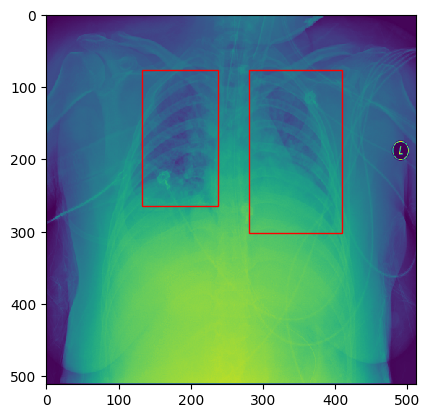

In [5]:
from matplotlib.patches import Rectangle
data = DataLoader(dataset, batch_size=1)

for i in data:
    fig, ax = plt.subplots()
    print(i)
    print(i[0][0].shape)
    ax.imshow(i[0][0], interpolation='nearest')

    for bb in i[1][0]:
        rect = Rectangle((bb[0],bb[1]),bb[2],bb[3],linewidth=1,edgecolor='r',facecolor='none')
        ax.add_patch(rect)
    break
plt.show()

In [6]:
dataset.__getitem__(4)

(tensor([[ 14,  63,  43,  ...,   6,   6,   6],
         [ 22, 106,  73,  ...,   7,   7,   7],
         [ 24, 125,  96,  ...,   7,   7,   7],
         ...,
         [  2,   7,   7,  ...,  14,  14,  14],
         [  2,   7,   8,  ...,  14,  14,  14],
         [  1,   4,   3,  ...,   6,   6,   6]], dtype=torch.uint8),
 tensor([[ 90,  92, 103, 253],
         [285, 137, 115, 238],
         [ -1,  -1,  -1,  -1],
         [ -1,  -1,  -1,  -1]]),
 tensor([1]))